In [1]:
import pandas as pd
# Load the data
train_data = pd.read_csv(r"data_train.csv")
dev_data = pd.read_csv(r"data_dev.csv")
test_data = pd.read_csv(r"data_test.csv")

In [2]:
import pandas as pd

def calculate_average_length(file_path):
    # Load the data
    data = pd.read_csv(file_path)

    # Ensure columns are present
    assert 'token' in data.columns, "The file must contain a 'token' column."
    assert 'label' in data.columns, "The file must contain a 'label' column."

    # List to store sentence lengths
    sentence_lengths = []
    current_sentence = []

    # Sentence-ending punctuation
    sentence_endings = [".", "!", "?"]

    for token in data['token']:
        current_sentence.append(token)
        if token in sentence_endings:
            sentence_lengths.append(len(current_sentence))  # Add sentence length
            current_sentence = []  # Start a new sentence

    # If there's a trailing sentence without an ending punctuation
    if current_sentence:
        sentence_lengths.append(len(current_sentence))

    # Calculate the average length
    average_length = sum(sentence_lengths) / len(sentence_lengths) if sentence_lengths else 0
    return average_length

# Paths to the CSV files
train_file = "data_train.csv"
dev_file = "data_dev.csv"
test_file = "data_test.csv"

# Calculate average lengths
train_avg_length = calculate_average_length(train_file)
dev_avg_length = calculate_average_length(dev_file)
test_avg_length = calculate_average_length(test_file)

print(f"Average sentence length in train.csv: {train_avg_length:.2f} tokens")
print(f"Average sentence length in dev.csv: {dev_avg_length:.2f} tokens")
print(f"Average sentence length in test.csv: {test_avg_length:.2f} tokens")


Average sentence length in train.csv: 28.66 tokens
Average sentence length in dev.csv: 27.90 tokens
Average sentence length in test.csv: 28.88 tokens


In [3]:
import pandas as pd

def prepare_data_with_token_limit(df, max_tokens):
    """
    Groups tokens and labels into sentences with a maximum token limit,
    ensuring no sentence ends with an incomplete entity, and assigns a unique ID to each sequence.

    Args:
        df (pd.DataFrame): Dataframe with columns 'token' and 'label'.
        max_tokens (int): Maximum number of tokens allowed in a sentence.

    Returns:
        sequences (list of dict): List of dictionaries containing 'id', 'tokens', and 'labels'.
    """
    sequences = []
    current_tokens = []
    current_labels = []
    sequence_id = 0

    for i, row in df.iterrows():
        token, label = row["token"], row["label"]

        # Add token and label to the current sequence
        current_tokens.append(token)
        current_labels.append(label)

        # Check if we reached the max token limit
        if len(current_tokens) >= max_tokens:
            # Save the current sequence with its ID
            sequences.append({
                "id": str(sequence_id),
                "tokens": current_tokens,
                "labels": current_labels
            })
            sequence_id += 1
            current_tokens = []
            current_labels = []

    # Add the last sequence if present
    if current_tokens:
        sequences.append({
            "id": str(sequence_id),
            "tokens": current_tokens,
            "labels": current_labels
        })

    return sequences

# Example usage
train_data = pd.read_csv("data_train.csv")  # Your dataset
max_tokens = 30  # Define your max token limit
train_sequences = prepare_data_with_token_limit(train_data, max_tokens)

# Display the first sequence
print(train_sequences[0])


{'id': '0', 'tokens': ['In', 'this', 'article', 'we', 'discuss', 'several', 'metrics', 'of', 'coherence', 'defined', 'using', 'centering', 'theory', 'and', 'investigate', 'the', 'usefulness', 'of', 'such', 'metrics', 'for', 'information', 'ordering', 'in', 'automatic', 'text', 'generation', '.', 'We', 'estimate'], 'labels': ['O', 'O', 'O', 'O', 'O', 'O', 'B', 'I', 'I', 'O', 'O', 'B', 'I', 'O', 'O', 'O', 'O', 'O', 'O', 'B', 'O', 'O', 'O', 'O', 'B', 'I', 'I', 'O', 'O', 'O']}


In [4]:
dev_sentences = prepare_data_with_token_limit(dev_data, max_tokens)
test_sentences = prepare_data_with_token_limit(test_data, max_tokens)



In [5]:
dev_sentences[0]

{'id': '0',
 'tokens': ['This',
  'article',
  'presents',
  'an',
  'investigation',
  'of',
  'corpus',
  'based',
  'methods',
  'for',
  'the',
  'automation',
  'of',
  'help',
  'desk',
  'e',
  'mail',
  'responses',
  '.',
  'Specifically',
  ',',
  'we',
  'investigate',
  'this',
  'problem',
  'along',
  'two',
  'operational',
  'dimensions',
  ':'],
 'labels': ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B',
  'O',
  'O',
  'O',
  'O',
  'B',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B',
  'I',
  'O']}

In [6]:
train_sequences[0]

{'id': '0',
 'tokens': ['In',
  'this',
  'article',
  'we',
  'discuss',
  'several',
  'metrics',
  'of',
  'coherence',
  'defined',
  'using',
  'centering',
  'theory',
  'and',
  'investigate',
  'the',
  'usefulness',
  'of',
  'such',
  'metrics',
  'for',
  'information',
  'ordering',
  'in',
  'automatic',
  'text',
  'generation',
  '.',
  'We',
  'estimate'],
 'labels': ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B',
  'I',
  'I',
  'O',
  'O',
  'B',
  'I',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B',
  'O',
  'O',
  'O',
  'O',
  'B',
  'I',
  'I',
  'O',
  'O',
  'O']}

In [7]:
import numpy as np
from transformers import BertTokenizerFast
from transformers import DataCollatorForTokenClassification  # This libary apply augumentation technique at runtime
from transformers import AutoModelForTokenClassification     # This class is responsible for load model into my memory


In [8]:
## tokenizer
# intializing tokenizer with help of bert model
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [9]:
tokenizer

BertTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [10]:
example_text = train_sequences[0]

# Tokenize the input text
tokenized_input = tokenizer(example_text['tokens'], is_split_into_words=True)

# Convert token IDs to tokens
tokens = tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])

# Get the word IDs that map each token to its original word
word_ids = tokenized_input.word_ids()


In [11]:
print(tokenized_input)
print("\n")
print(tokens)
print("\n")
print(word_ids)


{'input_ids': [101, 1999, 2023, 3720, 2057, 6848, 2195, 12046, 2015, 1997, 2522, 5886, 10127, 4225, 2478, 2415, 2075, 3399, 1998, 8556, 1996, 6179, 2791, 1997, 2107, 12046, 2015, 2005, 2592, 13063, 1999, 6882, 3793, 4245, 1012, 2057, 10197, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


['[CLS]', 'in', 'this', 'article', 'we', 'discuss', 'several', 'metric', '##s', 'of', 'co', '##her', '##ence', 'defined', 'using', 'center', '##ing', 'theory', 'and', 'investigate', 'the', 'useful', '##ness', 'of', 'such', 'metric', '##s', 'for', 'information', 'ordering', 'in', 'automatic', 'text', 'generation', '.', 'we', 'estimate', '[SEP]']


[None, 0, 1, 2, 3, 4, 5, 6, 6, 7, 8, 8, 8, 9, 10, 11, 11, 12, 13, 14, 15, 16, 16, 17, 18, 19, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 

In [12]:
print(f'Length of the tokens is : {len(tokens)}')
print(f'Length of the ner tags is: {len(train_sequences[0]["labels"])}')

Length of the tokens is : 38
Length of the ner tags is: 30


In [13]:
def tokenize_and_align_labels(examples, label_all_tokens=True):
    tokenized_inputs = {
        "input_ids": [],
        "attention_mask": [],
        "labels": []
    }

    for example in examples:  # Iterate over list of dictionaries
        tokenized = tokenizer(
        example["tokens"],
        truncation=True,  # Apply truncation
        padding='max_length',  # Apply padding
        max_length=30,  # Set max length
        is_split_into_words=True
    )
        labels = []
        word_ids = tokenized.word_ids()

        for i, word_id in enumerate(word_ids):
            if word_id is None:
                labels.append(-100)
            else:
                label = example["labels"][word_id]
                if label_all_tokens:
                    labels.append(label)
                else:
                    labels.append(label if i == 0 else -100)

        tokenized_inputs["input_ids"].append(tokenized["input_ids"])
        tokenized_inputs["attention_mask"].append(tokenized["attention_mask"])
        tokenized_inputs["labels"].append(labels)

    return tokenized_inputs


In [14]:
train_sequences[4:5]

[{'id': '4',
  'tokens': ['practice',
   ',',
   'the',
   'output',
   'from',
   'these',
   'systems',
   'needs',
   'to',
   'be',
   'edited',
   'to',
   'correct',
   'errors',
   '.',
   'A',
   'way',
   'of',
   'increasing',
   'the',
   'productivity',
   'of',
   'the',
   'whole',
   'translation',
   'process',
   '(',
   'MT',
   'plus',
   'human'],
  'labels': ['O',
   'O',
   'O',
   'B',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'B',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'B',
   'I',
   'O',
   'B',
   'O',
   'O']}]

In [15]:
q = tokenize_and_align_labels(train_sequences[4:5])
print(q)


{'input_ids': [[101, 3218, 1010, 1996, 6434, 2013, 2122, 3001, 3791, 2000, 2022, 5493, 2000, 6149, 10697, 1012, 1037, 2126, 1997, 4852, 1996, 15836, 1997, 1996, 2878, 5449, 2832, 1006, 11047, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], 'labels': [[-100, 'O', 'O', 'O', 'B', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B', 'I', 'O', 'B', -100]]}


In [16]:
for token, label in zip(tokenizer.convert_ids_to_tokens(q["input_ids"][0]),q["labels"][0]):
    print(f"{token:_<40} {label}")

[CLS]___________________________________ -100
practice________________________________ O
,_______________________________________ O
the_____________________________________ O
output__________________________________ B
from____________________________________ O
these___________________________________ O
systems_________________________________ O
needs___________________________________ O
to______________________________________ O
be______________________________________ O
edited__________________________________ O
to______________________________________ O
correct_________________________________ O
errors__________________________________ B
._______________________________________ O
a_______________________________________ O
way_____________________________________ O
of______________________________________ O
increasing______________________________ O
the_____________________________________ O
productivity____________________________ O
of______________________________________ O
the_____

In [17]:
## Applying on entire data
# tokenized_datasets = train_sequences.map(tokenize_and_align_labels, batched=True)

tokenized_datasets = [tokenize_and_align_labels([example]) for example in train_sequences]
# Using list comprehension to apply the function element-wise
# Notice: tokenize_and_align_labels expects a list of examples, so we wrap each example in a list


In [18]:
tokenized_datasets[0]

{'input_ids': [[101,
   1999,
   2023,
   3720,
   2057,
   6848,
   2195,
   12046,
   2015,
   1997,
   2522,
   5886,
   10127,
   4225,
   2478,
   2415,
   2075,
   3399,
   1998,
   8556,
   1996,
   6179,
   2791,
   1997,
   2107,
   12046,
   2015,
   2005,
   2592,
   102]],
 'attention_mask': [[1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1]],
 'labels': [[-100,
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'B',
   'B',
   'I',
   'I',
   'I',
   'I',
   'O',
   'O',
   'B',
   'B',
   'I',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'B',
   'B',
   'O',
   'O',
   -100]]}

In [19]:
# Defining model
ner_model = AutoModelForTokenClassification.from_pretrained("bert-base-uncased", num_labels=3)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:

import accelerate
import transformers

transformers.__version__, accelerate.__version__

('4.46.3', '1.1.1')

In [21]:

#Define training args
from transformers import TrainingArguments, Trainer
args = TrainingArguments(
"test-ner",
evaluation_strategy = "epoch",
learning_rate=2e-5,
per_device_train_batch_size=16,
per_device_eval_batch_size=16,
num_train_epochs=1,
weight_decay=0.01,
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [22]:

data_collator = DataCollatorForTokenClassification(tokenizer)

In [26]:
%pip install seqeval


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sha256=e0b983de118977ea36882eb5437de8142b97a0581f0829095917570feb06580f
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [99]:
# # Define the label names (update this with your own class names)
# labels = ['O', 'B', 'I']  # Example labels

# # Create the label-to-id and id-to-label mappings
# label2id = {label: i for i, label in enumerate(labels)}
# id2label = {i: label for i, label in enumerate(labels)}

# # Pass these mappings to the model
# ner_model.config.label2id = label2id
# ner_model.config.id2label = id2label


In [24]:
label_list = train_data["label"]
label_list


,label
0,O
1,O
2,O
3,O
4,O
...,...
26737,O
26738,B
26739,I
26740,I


In [27]:
from seqeval.metrics import precision_score, recall_score, f1_score, accuracy_score

def compute_metrics(eval_preds):
    pred_logits, labels = eval_preds
    print(eval_preds)

    # Get the predicted labels by applying argmax
    pred_labels = np.argmax(pred_logits, axis=2)

    # Define the label list (you should have this from your model's configuration)
    # Example: label_list = ['O', 'B-PER', 'I-PER', ...]

    label_list = ['O', 'B', 'I']  # Update this according to your task

    # Remove all the values where the label is -100 (ignored index)
    predictions = [
        [label_list[pred] for pred, l in zip(pred_seq, label_seq) if l != -100]
        for pred_seq, label_seq in zip(pred_labels, labels)
    ]

    true_labels = [
        [label_list[l] for l in label_seq if l != -100]
        for label_seq in labels
    ]

    # Calculate precision, recall, F1, and accuracy using seqeval metrics
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    accuracy = accuracy_score(true_labels, predictions)

    return {
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "accuracy": accuracy,
    }


In [28]:
class CustomDataset:
    def __init__(self, encodings):
        """
        Initialize the dataset with tokenized encodings.

        Args:
            encodings (dict): A dictionary containing 'input_ids', 'attention_mask', and 'labels'.
        """
        self.encodings = encodings

    def __getitem__(self, idx):
        """
        Get a single sample from the dataset.

        Args:
            idx (int): The index of the sample to retrieve.

        Returns:
            dict: A dictionary containing 'input_ids', 'attention_mask', and 'labels' for the given index.
        """
        return {key: val[idx] for key, val in self.encodings.items()}

    def __len__(self):
        """
        Get the total number of samples in the dataset.

        Returns:
            int: The number of samples.
        """
        return len(self.encodings["input_ids"])


In [29]:
def tokenize_and_align_labels(dataset):
    tokenized_inputs = tokenizer(
        [example["tokens"] for example in dataset],  # List of token sequences
        truncation=True,
        padding='max_length',
        max_length=128,
        is_split_into_words=True
    )

    label_mapping = {'O': 0, 'B': 1, 'I': 2}  # Adjust as needed
    labels = []

    for i, example in enumerate(dataset):
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        aligned_labels = []
        for word_id in word_ids:
            if word_id is None:
                aligned_labels.append(-100)  # Ignore this token
            else:
                aligned_labels.append(label_mapping.get(example["labels"][word_id], -100))
        labels.append(aligned_labels)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

# Prepare the train and dev encodings
train_encodings = tokenize_and_align_labels(train_sequences)
dev_encodings = tokenize_and_align_labels(dev_sentences)


In [30]:
train_dataset = CustomDataset(train_encodings)
dev_dataset = CustomDataset(dev_encodings)


In [31]:
print(len(train_dataset))  # Total training samples
print(train_dataset[0])    # Example of a single sample


892
{'input_ids': [101, 1999, 2023, 3720, 2057, 6848, 2195, 12046, 2015, 1997, 2522, 5886, 10127, 4225, 2478, 2415, 2075, 3399, 1998, 8556, 1996, 6179, 2791, 1997, 2107, 12046, 2015, 2005, 2592, 13063, 1999, 6882, 3793, 4245, 1012, 2057, 10197, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [33]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",           # Output directory
    evaluation_strategy="epoch",     # Evaluate every epoch
    logging_dir="./logs",            # Directory for logs
    logging_steps=10,                # Log every 10 steps
    per_device_train_batch_size=8,   # Batch size for training
    per_device_eval_batch_size=16,   # Batch size for evaluation
    num_train_epochs=3,              # Total number of training epochs
    save_strategy="epoch",           # Save model every epoch
    load_best_model_at_end=True,     # Load the best model at the end
    logging_first_step=True,         # Log the first training step
    save_total_limit=2,              # Save only the 2 most recent models
    remove_unused_columns=False,     # Keep unused columns for metrics
    fp16=True,                       # Use mixed precision (if supported by GPU)
    report_to=["none"],              # Logging options: "none", "tensorboard", etc.
)

# Pass `training_args` to the Trainer instance
trainer = Trainer(
    model=ner_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=dev_dataset,
    compute_metrics=compute_metrics,
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [36]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",           # Output directory
    evaluation_strategy="epoch",     # Evaluate every epoch
    logging_dir="./logs",            # Directory for logs
    logging_steps=10,                # Log every 10 steps
    per_device_train_batch_size=8,   # Batch size for training
    per_device_eval_batch_size=16,   # Batch size for evaluation
    num_train_epochs=10,              # Total number of training epochs
    save_strategy="epoch",           # Save model every epoch
    load_best_model_at_end=True,     # Load the best model at the end
    logging_first_step=True,         # Log the first training step
    save_total_limit=2,              # Save only the 2 most recent models
    remove_unused_columns=False,     # Keep unused columns for metrics
    fp16=True,                       # Use mixed precision (if supported by GPU)
    report_to=["none"],              # Logging options: "none", "tensorboard", etc.
)

# Pass `training_args` to the Trainer instance
trainer = Trainer(
    model=ner_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=dev_dataset,
    compute_metrics=compute_metrics,
)
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.215100,0.472328,0.575000,0.582278,0.578616,0.845308
2,0.155400,0.500828,0.579882,0.620253,0.599388,0.849330
3,0.110600,0.607814,0.577912,0.604430,0.590874,0.840214
4,0.074000,0.621673,0.567883,0.615506,0.590737,0.845308
5,0.040900,0.787145,0.581359,0.582278,0.581818,0.851743
6,0.019600,0.866389,0.564214,0.618671,0.590189,0.843432
7,0.010700,0.949016,0.554804,0.648734,0.598104,0.843700
8,0.006000,0.933034,0.567055,0.615506,0.590288,0.848525
9,0.007400,0.955192,0.574128,0.625000,0.598485,0.849062
10,0.003700,0.995693,0.577259,0.626582,0.600910,0.845576


TrainOutput(global_step=1120, training_loss=0.06252286624762096, metrics={'train_runtime': 198.1546, 'train_samples_per_second': 45.015, 'train_steps_per_second': 5.652, 'total_flos': 582697035601920.0, 'train_loss': 0.06252286624762096, 'epoch': 10.0})

In [34]:
trainer.train()

Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.309900,0.407446,0.615514,0.577532,0.595918,0.849062
2,0.210900,0.421951,0.588685,0.609177,0.598756,0.847989
3,0.197800,0.469766,0.576369,0.632911,0.603318,0.845845


TrainOutput(global_step=336, training_loss=0.2849602440283412, metrics={'train_runtime': 74.0276, 'train_samples_per_second': 36.149, 'train_steps_per_second': 4.539, 'total_flos': 174809110680576.0, 'train_loss': 0.2849602440283412, 'epoch': 3.0})

In [37]:
# trainer.train()  # Start training

# After training, evaluate and print results
results = trainer.evaluate()
print("Evaluation Results:", results)


Evaluation Results: {'eval_loss': 0.4723280370235443, 'eval_precision': 0.575, 'eval_recall': 0.5822784810126582, 'eval_f1': 0.5786163522012578, 'eval_accuracy': 0.8453083109919571, 'eval_runtime': 0.3474, 'eval_samples_per_second': 316.61, 'eval_steps_per_second': 20.148, 'epoch': 10.0}


In [52]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torch

def plot_confusion_matrix(model, test_dataset, label_list, tokenizer):
    """
    Plots a confusion matrix for the predictions on the test dataset.
    """
    model.eval()  # Set the model to evaluation mode
    predictions, true_labels = [], []

    # Define the label-to-id and id-to-label mappings (assuming label_list contains your labels)
    label2id = {label: i for i, label in enumerate(label_list)}
    id2label = {i: label for i, label in enumerate(label_list)}

    # Get the device the model is on
    device = next(model.parameters()).device

    # Iterate through the test dataset and collect predictions and true labels
    for batch in test_dataset:
        # Convert token IDs back to words using the tokenizer
        sentences = tokenizer.batch_decode(batch["input_ids"], skip_special_tokens=True)  # Decode token IDs to sentences
        inputs = tokenizer(sentences, padding=True, truncation=True, is_split_into_words=True, return_tensors="pt").to(device)
        labels = batch["labels"]  # Assuming labels are in 'labels' key

        with torch.no_grad():
            outputs = model(**inputs)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=2).detach().cpu().numpy()

        # Convert predictions and true labels to label strings
        # Fix the iteration to handle predictions and labels correctly
        for pred_seq, label_seq in zip(preds, labels):
            preds_tokens = [id2label[p] for p, l in zip(pred_seq, label_seq) if l != -100]
            true_tokens = [id2label[l] for l in label_seq if l != -100]

            predictions.append(preds_tokens)
            true_labels.append(true_tokens)

    # Flatten the predictions and labels
    flat_preds = [label for seq in predictions for label in seq]
    flat_true = [label for seq in true_labels for label in seq]

    # Generate confusion matrix
    cm = confusion_matrix(flat_true, flat_preds, labels=label_list)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_list)

    # Plot the confusion matrix
    plt.figure(figsize=(12, 10))
    disp.plot(cmap=plt.cm.Blues, xticks_rotation=90)
    plt.title("Confusion Matrix")
    plt.show()

# Usage example:
# Assuming `test_sentences` is your raw test data (sentences with words) and `label_list` is defined
test_encodings = tokenize_and_align_labels(test_sentences)  # Tokenize test data
test_dataset = CustomDataset(test_encodings)  # Create a CustomDataset instance
plot_confusion_matrix(ner_model, test_dataset, label_list, tokenizer)  # Pass to the confusion matrix plotter


TypeError: 'int' object is not iterable

In [54]:
from transformers import AutoTokenizer, AutoModelForTokenClassification

# Save the model and tokenizer
def save_model(model, tokenizer, output_dir):
    """
    Saves the model and tokenizer to the specified directory.
    """
    model.save_pretrained(output_dir)
    tokenizer.save_pretrained(output_dir)
    print(f"Model and tokenizer saved to {output_dir}")

# Example usage:
output_dir = "./ner_model"
save_model(ner_model, tokenizer, output_dir)

# Load the model and tokenizer for inference
def load_model(output_dir):
    """
    Loads the model and tokenizer from the specified directory.
    """
    tokenizer = AutoTokenizer.from_pretrained(output_dir)
    model = AutoModelForTokenClassification.from_pretrained(output_dir)
    return model, tokenizer

# Example usage:
model, tokenizer = load_model(output_dir)


Model and tokenizer saved to ./ner_model


In [69]:
import torch

def predict_ner(text, model, tokenizer, id2label):
    """
    Performs NER on the given text using the trained model.
    Args:
        text (str): The input text for NER.
        model: The trained NER model.
        tokenizer: Tokenizer corresponding to the model.
        id2label (dict): Mapping of label IDs to label names.

    Returns:
        List of tuples: Each tuple contains a token and its predicted label.
    """
    # Tokenize input text without setting `is_split_into_words=True`
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)

    # Get the predicted labels
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=2).squeeze().tolist()

    # Map predictions to labels
    tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"].squeeze().tolist())
    labels = [id2label[pred] for pred in predictions]

    # Pair tokens with labels, excluding special tokens ([CLS], [SEP], etc.)
    predictions_with_labels = [
        (token, label) for token, label in zip(tokens, labels) if token not in tokenizer.all_special_tokens
    ]
    return predictions_with_labels

# Example usage:
text = "This paper aims to solve machine translation tagging problem using neural networks."
id2label = {0: "O", 1: "B", 2: "I"}  # Replace with your actual mapping
predictions = predict_ner(text, model, tokenizer, id2label)

# Display the predictions
for token, label in predictions:
    print(f"{token}: {label}")


this: O
paper: O
aims: O
to: O
solve: O
machine: B
translation: I
tag: I
##ging: I
problem: I
using: O
neural: B
networks: I
.: O


In [68]:
import torch

def predict_ner(text, model, tokenizer, id2label):
    """
    Performs NER on the given text using the trained model.
    Args:
        text (str): The input text for NER.
        model: The trained NER model.
        tokenizer: Tokenizer corresponding to the model.
        id2label (dict): Mapping of label IDs to label names.

    Returns:
        List of tuples: Each tuple contains a token and its predicted label.
    """
    # Tokenize input text without setting `is_split_into_words=True`
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)

    # Get the predicted labels
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=2).squeeze().tolist()

    # Map predictions to labels
    tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"].squeeze().tolist())
    labels = [id2label[pred] for pred in predictions]

    # Apply B/I rule: If a token belongs to an entity, ensure the first token is "B" and the rest are "I"
    new_labels = []
    inside_entity = False
    for i, (token, label) in enumerate(zip(tokens, labels)):
        # Exclude special tokens ([CLS], [SEP], etc.)
        if token in tokenizer.all_special_tokens:
            continue

        if label == "O":  # If it's outside any entity
            inside_entity = False
            new_labels.append(label)
        else:
            if not inside_entity:  # Start of a new entity
                new_labels.append("B")
                inside_entity = True
            else:  # Inside an entity
                new_labels.append("I")

    # Pair tokens with labels, excluding special tokens
    predictions_with_labels = [
        (token, label) for token, label in zip(tokens, new_labels) if token not in tokenizer.all_special_tokens
    ]

    return predictions_with_labels

# Example usage:
text = "This paper aims to solve machine translation tagging problem using neural networks."
id2label = {0: "O", 1: "B", 2: "I"}  # Replace with your actual mapping
predictions = predict_ner(text, model, tokenizer, id2label)

# Display the predictions
for token, label in predictions:
    print(f"{token}: {label}")


this: O
paper: O
aims: O
to: O
solve: B
machine: I
translation: I
tag: I
##ging: I
problem: O
using: B
neural: I
networks: O


Processing sentence: Systems based on synchronous grammars and tree transducers promise to improve the quality of statistical machine translation output , but are often very computationally intensive . The complexity is exponential
Processing sentence: in the size of individual grammar rules due to arbitrary re orderings between the two languages . We develop a theory of binarization for synchronous context free grammars and present
Processing sentence: a linear time algorithm for binarizing synchronous rules when possible . In our large scale experiments , we found that almost all rules are binarizable and the resulting binarized rule
Processing sentence: set significantly improves the speed and accuracy of a state of the art syntax based machine translation system . We also discuss the more general , and computationally more difficult
Processing sentence: , problem of finding good parsing strategies for non binarizable rules , and present an approximate polynomial time algorithm for 

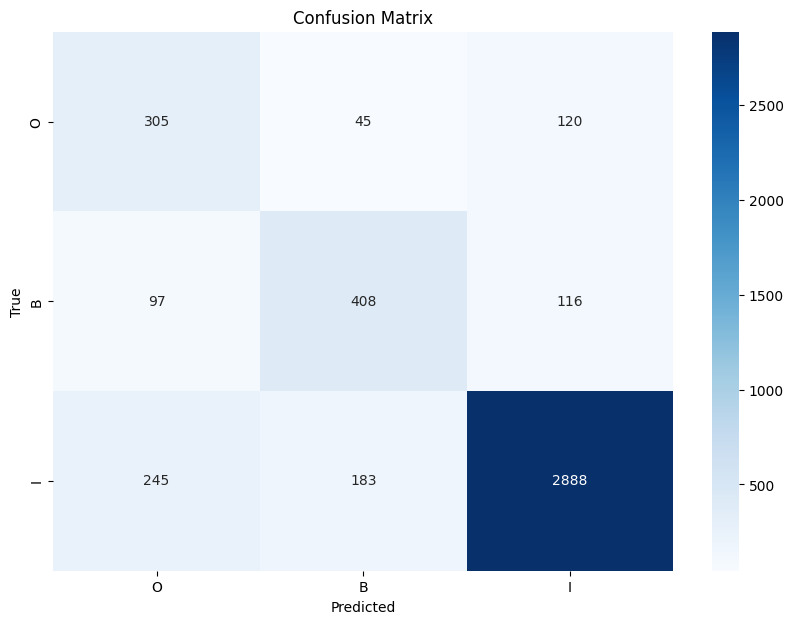

In [84]:
import torch
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer, AutoModelForTokenClassification
import numpy as np

# Function to predict labels for a given sentence using a trained model
def predict_ner(sentence, model, tokenizer, id2label):
    """
    Predict named entities for a sentence using a NER model.
    Args:
        sentence (str): Input sentence.
        model: Pre-trained NER model.
        tokenizer: Tokenizer associated with the model.
        id2label (dict): Mapping from label IDs to label names.
    """
    # Tokenize the input sentence
    inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True)

    # Get predictions from the model
    with torch.no_grad():
        outputs = model(**inputs)

    # Get predicted labels from the outputs
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)

    # Convert predicted token IDs to labels
    predicted_labels = [id2label[pred.item()] for pred in predictions[0]]

    # Return tokens and corresponding predicted labels
    return inputs.tokens(), predicted_labels

def evaluate_model_on_test_sentences(test_sentences, model, tokenizer, id2label):
    """
    Evaluate a saved model on a list of tokenized test sentences with their labels.
    Args:
        test_sentences (list): List of dictionaries with 'tokens' and 'labels'.
        model: Trained NER model.
        tokenizer: Tokenizer for the model.
        id2label (dict): Mapping from label IDs to label names.
    """
    true_labels = []
    predicted_labels = []

    for sentence_data in test_sentences:
        tokens = sentence_data['tokens']
        true_sentence_labels = sentence_data['labels']

        if len(tokens) <= 1:
            print(f"Skipping sentence with only one token or punctuation: {' '.join(tokens)}")
            continue

        # Join tokens back into a sentence for tokenization
        sentence = " ".join(tokens)

        # Get predictions for the sentence
        print(f"Processing sentence: {' '.join(tokens)}")
        predicted_tokens, predicted_labels_for_sentence = predict_ner(sentence, model, tokenizer, id2label)

        if predicted_labels_for_sentence:
            # Remove special tokens (like [CLS], [SEP], etc.) from both true and predicted labels
            filtered_true_labels = []
            filtered_pred_labels = []

            true_label_idx = 0
            for i, token in enumerate(predicted_tokens):
                if token not in tokenizer.all_special_tokens:
                    # Repeat the true label for subword tokens
                    if true_label_idx < len(true_sentence_labels):  # Check if index is within bounds
                        filtered_true_labels.append(true_sentence_labels[true_label_idx])
                        filtered_pred_labels.append(predicted_labels_for_sentence[i])

                    # Move to the next true label after handling one word
                    if not token.startswith("##"):  # if it's not a subword token
                        true_label_idx += 1

            # Ensure the true labels and predicted labels align
            true_labels.extend(filtered_true_labels)
            predicted_labels.extend(filtered_pred_labels)

        else:
            print(f"Prediction missing for sentence: {' '.join(tokens)}")

    # Check if lengths match
    if len(true_labels) != len(predicted_labels):
        print(f"Warning: Mismatch in number of true labels and predicted labels.")
        print(f"True labels length: {len(true_labels)}")
        print(f"Predicted labels length: {len(predicted_labels)}")

    # Evaluate using classification report and confusion matrix
    print("Classification Report:")
    print(classification_report(true_labels, predicted_labels))

    # Generate confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Plot the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=id2label.values(), yticklabels=id2label.values())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()




# Example usage:
# 1. Load the trained model and tokenizer from the saved directory
model_dir = "./ner_model"  # Path to your saved model directory
tokenizer_dir = model_dir  # Path to your saved tokenizer directory

model = AutoModelForTokenClassification.from_pretrained(model_dir)
tokenizer = AutoTokenizer.from_pretrained(tokenizer_dir)

# 2. Define your id2label mapping
id2label = {0: "O", 1: "B", 2: "I"}  # Replace with your actual mapping

# 3. Evaluate the model on the test dataset
csv_path = "data_test.csv"  # Replace with the actual CSV file path
evaluate_model_on_test_sentences(test_sentences, model, tokenizer, id2label)


In [87]:
import random

def print_sample_results(test_sentences, model, tokenizer, id2label, num_samples=5):
    """
    Print a few sample results from test sentences, showing the predicted and actual labels.

    Args:
        test_sentences (list): List of dictionaries with 'tokens' and 'labels'.
        model: Trained NER model.
        tokenizer: Tokenizer for the model.
        id2label (dict): Mapping from label IDs to label names.
        num_samples (int): Number of samples to print.
    """
    sample_sentences = random.sample(test_sentences, num_samples)  # Select random sample sentences

    for sentence_data in sample_sentences:
        tokens = sentence_data['tokens']
        true_sentence_labels = sentence_data['labels']

        # Join tokens back into a sentence for tokenization
        sentence = " ".join(tokens)

        # Get predictions for the sentence
        predicted_tokens, predicted_labels_for_sentence = predict_ner(sentence, model, tokenizer, id2label)

        if predicted_labels_for_sentence:
            # Align predicted labels and true labels
            filtered_true_labels = []
            filtered_pred_labels = []
            true_label_idx = 0
            for i, token in enumerate(predicted_tokens):
                if token not in tokenizer.all_special_tokens:
                    if true_label_idx < len(true_sentence_labels):  # Check if index is within bounds
                        filtered_true_labels.append(true_sentence_labels[true_label_idx])
                        filtered_pred_labels.append(predicted_labels_for_sentence[i])

                    # Move to the next true label after handling one word
                    if not token.startswith("##"):  # if it's not a subword token
                        true_label_idx += 1

            # Print the sample sentence, predicted and actual labels
            print(f"Sentence: {' '.join(tokens)}")
            print(f"True Labels: {filtered_true_labels}")
            print(f"Predicted Labels: {filtered_pred_labels}")
            print("-" * 80)
        else:
            print(f"Prediction missing for sentence: {' '.join(tokens)}")
            print("-" * 80)

# Example usage
print_sample_results(test_sentences, model, tokenizer, id2label, num_samples=5)


Sentence: has many unique properties . It has already been shown that phrase tables constructed from parallel corpora translated in the same direction as the translation task outperform those constructed from
True Labels: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B', 'I', 'O', 'O', 'B', 'I', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B', 'I', 'O', 'O', 'O', 'O', 'O', 'O']
Predicted Labels: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B', 'I', 'O', 'O', 'B', 'I', 'I', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B', 'I', 'O', 'O', 'O', 'O', 'O', 'O']
--------------------------------------------------------------------------------
Sentence: of known topics can help identify the topic of the new text . Typically , a distributional distance is used to capture the implicit semantic distance between two pieces of
True Labels: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B', 'I', 'I', 'O', 'O', 'O', 'O', 'O', 'B', 'I', 'I', 'O', 'O', 'O', '